In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import io

In [3]:
qpcr_results = pd.read_excel("./20200402 BPGX LOD 30.xlsx", sheet_name="Results", skiprows=42, na_values=['Undetermined'])

# Standard Curve

In [4]:
sc = qpcr_results[qpcr_results['Sample Name'].str.contains('PCD')]

In [5]:
sc[['Sample Name', 'CT', 'Quantity', 'Amp Status']]

,Sample Name,CT,Quantity,Amp Status
15,PCD 1,18.100512,1.000000e+00,Inconclusive
16,PCD 1,17.745937,1.000000e+00,Inconclusive
17,PCD 1,17.838802,1.000000e+00,Inconclusive
33,PCD 2,21.744062,1.000000e-01,Amp
34,PCD 2,21.584158,1.000000e-01,Amp
35,PCD 2,21.290998,1.000000e-01,Amp
51,PCD 3,25.404478,1.000000e-02,Amp
52,PCD 3,24.872110,1.000000e-02,Amp
53,PCD 3,24.585209,1.000000e-02,Amp
69,PCD 4,29.112562,1.000000e-03,Amp


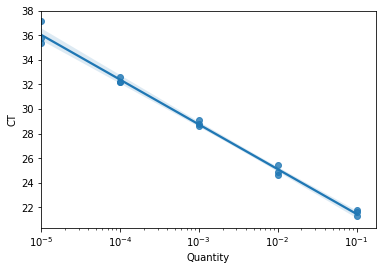

In [6]:
ax = sns.regplot(data=sc[sc['Amp Status'] == 'Amp'], x='Quantity', y='CT', logx=True)
ax.set_xscale('log')

In [8]:
negs = qpcr_results.loc[qpcr_results['Sample Name'].str.contains('Negative')]
negs

,Well,Well Position,Omit,Sample Name,Target Name,Task,Reporter,Quencher,CT,Ct Mean,...,Ct Threshold,Automatic Baseline,Baseline Start,Baseline End,Amp Status,Comments,CQCONF,AMPNC,EXPFAIL,HIGHSD
117,79,G7,False,Negative,FAM,NTC,FAM,NFQ-MGB,NaN,NaN,...,21239.898003,True,3,21,No Amp,NaN,N,N,N,N
118,79,G7,False,Negative,VIC,NTC,VIC,NFQ-MGB,NaN,NaN,...,311.720376,True,3,9,No Amp,NaN,N,N,N,N
119,80,G8,False,Negative,FAM,NTC,FAM,NFQ-MGB,NaN,NaN,...,21239.898003,True,3,8,Inconclusive,NaN,N,N,N,N
120,80,G8,False,Negative,VIC,NTC,VIC,NFQ-MGB,NaN,NaN,...,311.720376,True,3,49,No Amp,NaN,N,N,N,N
121,81,G9,False,Negative,FAM,NTC,FAM,NFQ-MGB,NaN,NaN,...,21239.898003,True,3,3,No Amp,NaN,N,N,N,N
122,81,G9,False,Negative,VIC,NTC,VIC,NFQ-MGB,NaN,NaN,...,311.720376,True,3,49,No Amp,NaN,N,N,N,N
138,91,H7,False,Negative,FAM,NTC,FAM,NFQ-MGB,NaN,NaN,...,21239.898003,True,3,38,No Amp,NaN,N,Y,N,N
139,91,H7,False,Negative,VIC,NTC,VIC,NFQ-MGB,10.419770,NaN,...,311.720376,True,3,7,No Amp,NaN,N,Y,N,N
140,92,H8,False,Negative,FAM,NTC,FAM,NFQ-MGB,NaN,NaN,...,21239.898003,True,3,49,No Amp,NaN,N,N,N,N
141,92,H8,False,Negative,VIC,NTC,VIC,NFQ-MGB,NaN,NaN,...,311.720376,True,3,49,No Amp,NaN,N,N,N,N


# Endogenous Controls

In [9]:
endo = qpcr_results.loc[(qpcr_results['Reporter'] == 'FAM') & qpcr_results['Sample Name'].str.contains('Endogenous')]
endo[['Sample Name', 'Amp Status']]

,Sample Name,Amp Status
12,1 Endogenous,Amp
13,6 Endogenous,Amp
14,44 Endogenous,Amp
30,2 Endogenous,Amp
31,7 Endogenous,Amp
32,45 Endogenous,Amp
48,3 Endogenous,Amp
49,8 Endogenous,Amp
50,46 Endogenous,Amp
66,4 Endogenous,Amp


In [10]:
endo.loc[:, 'Sample Number'] = endo['Sample Name'].str.replace(r'[\D]*([0-9]+)[\D]*', r'\1').astype(np.int)

/Users/anton/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/anton/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


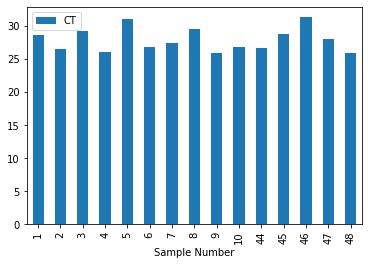

In [11]:
endo.sort_values(by=['Sample Number']).plot.bar(x='Sample Number', y='CT')

In [12]:
endo['CT'].describe()

count    15.000000
mean     27.907068
std       1.796515
min      25.884184
25%      26.604014
50%      27.434315
75%      28.982191
max      31.340343
Name: CT, dtype: float64

# CoV

In [21]:
ncov = qpcr_results[(qpcr_results['Reporter'] == 'FAM') & qpcr_results['Sample Name'].str.contains('nCoV')]

In [22]:
ncov.loc[:, 'Sample Number'] = ncov['Sample Name'].str.replace(r'[\D]*([0-9]+)[\D]*', r'\1').astype(np.int)

/Users/anton/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/anton/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


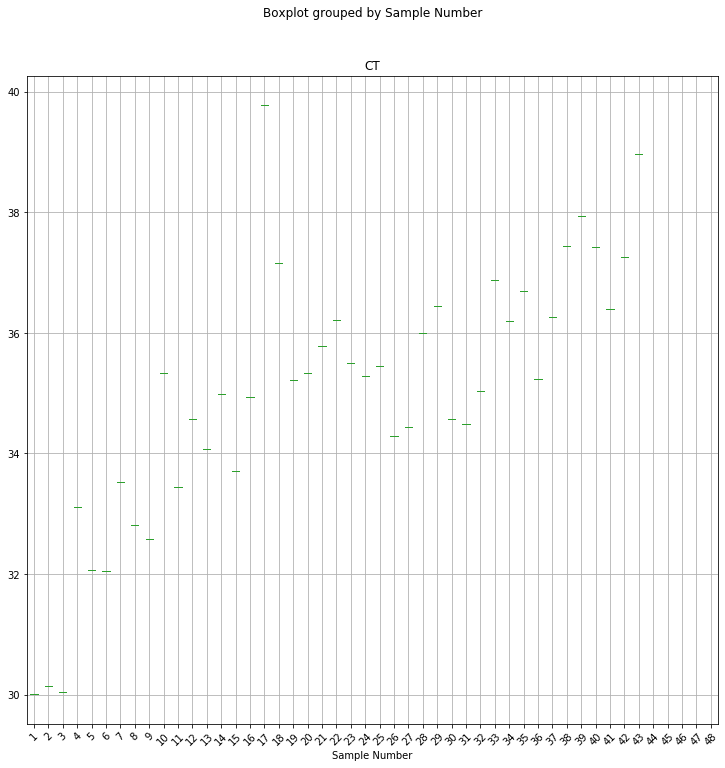

In [23]:
ncov.boxplot(by='Sample Number', column='CT', rot=45, figsize=(12,12))

In [24]:
sample_data = '''
Sample Number	NP Sample	"Spike"	Control	"Control Conc"	"Volume"
1		1000	PCD 1	2.00E+05	5
2		1000	PCD 1	2.00E+05	5
3		1000	PCD 1	2.00E+05	5
4		200	PCD 1	2.00E+05	1
5		200	PCD 1	2.00E+05	1
6		200	PCD 1	2.00E+05	1
7		100	PCD 2	2.00E+04	5
8		100	PCD 2	2.00E+04	5
9		100	PCD 2	2.00E+04	5
10		60	PCD 2	2.00E+04	3
11		60	PCD 2	2.00E+04	3
12		60	PCD 2	2.00E+04	3
13		60	PCD 2	2.00E+04	3
14		60	PCD 2	2.00E+04	3
15		60	PCD 2	2.00E+04	3
16		60	PCD 2	2.00E+04	3
17		60	PCD 2	2.00E+04	3
18		30	PCD 3	2.00E+03	15
19		30	PCD 3	2.00E+03	15
20		30	PCD 3	2.00E+03	15
21		30	PCD 3	2.00E+03	15
22		30	PCD 3	2.00E+03	15
23		30	PCD 3	2.00E+03	15
24		30	PCD 3	2.00E+03	15
25		30	PCD 3	2.00E+03	15
26		30	PCD 3	2.00E+03	15
27		30	PCD 3	2.00E+03	15
28		30	PCD 3	2.00E+03	15
29		30	PCD 3	2.00E+03	15
30		30	PCD 3	2.00E+03	15
31		30	PCD 3	2.00E+03	15
32		30	PCD 3	2.00E+03	15
33		30	PCD 3	2.00E+03	15
34		30	PCD 3	2.00E+03	15
35	MM	30	PCD 3	2.00E+03	15
36	WC	30	PCD 3	2.00E+03	15
37	AK	30	PCD 3	2.00E+03	15
38	MM	20	PCD 3	2.00E+03	10
39	WC	20	PCD 3	2.00E+03	10
40	AK	20	PCD 3	2.00E+03	10
41	CC	10	PCD 3	2.00E+03	5
42	AJ	10	PCD 3	2.00E+03	5
43	CC	10	PCD 3	2.00E+03	5
44	AJ	0	NEG	2.00E+03	0
45	CC	0	NEG	2.00E+03	0
46	MM	0	NEG	2.00E+03	0
47	WC	0	NEG	2.00E+03	0
48	AK	0	NEG	2.00E+03	0'''

sample_data = pd.read_table(io.StringIO(sample_data))

In [25]:
ncov = ncov.merge(sample_data)

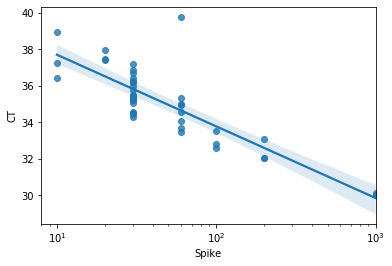

In [26]:
ax = sns.regplot(data=ncov, x='Spike', y='CT', logx=True)
ax.set_xscale('log')

## Yield

In [28]:
ncov['Quantity'] = ncov['Quantity'] * 1e6

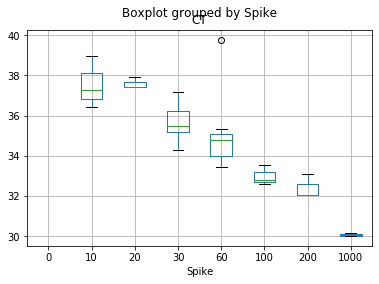

In [30]:
ncov.boxplot(by='Spike', column='CT')

In [31]:
ncov['RNA Input'] = ncov['Spike'] * 400 / 30 * 5

In [32]:
ncov.loc[:,'Yield'] = ncov['Quantity'] / ncov['RNA Input']

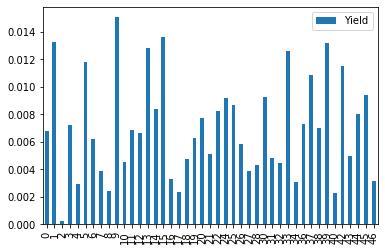

In [33]:
ncov[ncov['Yield'] < 1][['Sample Name','Yield']].plot.bar()

In [34]:
ncov[ncov['Yield'] < 1]['Yield'].describe()

count    43.000000
mean      0.007071
std       0.003669
min       0.000232
25%       0.004391
50%       0.006798
75%       0.009247
max       0.015082
Name: Yield, dtype: float64

In [49]:
ncov.boxplot(by='RNA Input', column='CT')

AttributeError: 'Series' object has no attribute 'boxplot'

## Diag

In [35]:
pos = qpcr_results[qpcr_results['Sample Name']=='PCD 1']
(pos['CT'] > 16).all()
(pos['CT'] < 23).all()

True

In [36]:
pos

,Well,Well Position,Omit,Sample Name,Target Name,Task,Reporter,Quencher,CT,Ct Mean,...,Ct Threshold,Automatic Baseline,Baseline Start,Baseline End,Amp Status,Comments,CQCONF,AMPNC,EXPFAIL,HIGHSD
15,10,A10,False,PCD 1,FAM,STANDARD,FAM,NFQ-MGB,18.100512,17.895082,...,21239.898003,True,3,11,Inconclusive,NaN,N,N,N,N
16,11,A11,False,PCD 1,FAM,STANDARD,FAM,NFQ-MGB,17.745937,17.895082,...,21239.898003,True,3,11,Inconclusive,NaN,N,N,N,N
17,12,A12,False,PCD 1,FAM,STANDARD,FAM,NFQ-MGB,17.838802,17.895082,...,21239.898003,True,3,12,Inconclusive,NaN,N,N,N,N


In [37]:
neg = qpcr_results[(qpcr_results['Sample Name']=='Negative') & (qpcr_results['Target Name'] == 'FAM')]
neg

,Well,Well Position,Omit,Sample Name,Target Name,Task,Reporter,Quencher,CT,Ct Mean,...,Ct Threshold,Automatic Baseline,Baseline Start,Baseline End,Amp Status,Comments,CQCONF,AMPNC,EXPFAIL,HIGHSD
117,79,G7,False,Negative,FAM,NTC,FAM,NFQ-MGB,NaN,NaN,...,21239.898003,True,3,21,No Amp,NaN,N,N,N,N
119,80,G8,False,Negative,FAM,NTC,FAM,NFQ-MGB,NaN,NaN,...,21239.898003,True,3,8,Inconclusive,NaN,N,N,N,N
121,81,G9,False,Negative,FAM,NTC,FAM,NFQ-MGB,NaN,NaN,...,21239.898003,True,3,3,No Amp,NaN,N,N,N,N
138,91,H7,False,Negative,FAM,NTC,FAM,NFQ-MGB,NaN,NaN,...,21239.898003,True,3,38,No Amp,NaN,N,Y,N,N
140,92,H8,False,Negative,FAM,NTC,FAM,NFQ-MGB,NaN,NaN,...,21239.898003,True,3,49,No Amp,NaN,N,N,N,N
142,93,H9,False,Negative,FAM,NTC,FAM,NFQ-MGB,NaN,NaN,...,21239.898003,True,3,49,No Amp,NaN,N,N,N,N
144,94,H10,False,Negative,FAM,NTC,FAM,NFQ-MGB,NaN,NaN,...,21239.898003,True,3,12,No Amp,NaN,N,N,N,N
146,95,H11,False,Negative,FAM,NTC,FAM,NFQ-MGB,48.251057,NaN,...,21239.898003,True,3,3,No Amp,NaN,N,N,N,N
148,96,H12,False,Negative,FAM,NTC,FAM,NFQ-MGB,NaN,NaN,...,21239.898003,True,3,3,No Amp,NaN,N,N,N,N


In [38]:
ierc = qpcr_results[(qpcr_results['Reporter'] == 'VIC') & qpcr_results['Sample Name'].str.contains('nCoV')]

In [39]:
ierc['CT'].describe()

count    48.000000
mean     29.920494
std       1.776009
min      26.544855
25%      28.737288
50%      30.016071
75%      30.791812
max      34.738200
Name: CT, dtype: float64

In [40]:
ierc.sort_values(by='Sample Name')[['Sample Name','CT','Amp Status']]

,Sample Name,CT,Amp Status
1,1 nCoV,33.114360,Amp
21,10 nCoV,27.131563,Amp
39,11 nCoV,30.289766,Amp
57,12 nCoV,32.050910,Amp
75,13 nCoV,30.759327,Amp
93,14 nCoV,30.889269,Amp
108,15 nCoV,29.367440,Amp
129,16 nCoV,31.035670,Amp
5,17 nCoV,32.877895,Inconclusive
23,18 nCoV,28.686344,Amp


In [41]:
ncov.sort_values(by='Sample Number')[['Sample Name','CT','Spike','Amp Status']]

,Sample Name,CT,Spike,Amp Status
0,1 nCoV,30.005438,1000,Amp
6,2 nCoV,30.143522,1000,Amp
12,3 nCoV,30.043621,1000,Amp
18,4 nCoV,33.108036,200,Amp
24,5 nCoV,32.066750,200,Amp
30,6 nCoV,32.055195,200,Amp
36,7 nCoV,33.529670,100,Amp
42,8 nCoV,32.807423,100,Amp
1,9 nCoV,32.587660,100,Amp
7,10 nCoV,35.334473,60,Amp


In [42]:
diags = list()
for i in range(1,49):
    name = "{} nCoV".format(i) 
    
    sample_data = qpcr_results[qpcr_results['Sample Name'] == '{} nCoV'.format(i)].set_index('Target Name')
    ierc = sample_data.loc['VIC']
    ncov = sample_data.loc['FAM']
    
    result = {
        'Sample Name': name, 
        'Result': 'Unknown', 
        'Type': 'Unknown', 
        'CT': ncov['CT'], 
        'Quantity': ncov['Quantity'],
        'IECRNA CT': ierc['CT']}
    
    if ncov['Amp Status'] == 'Amp':
        result['Result'] = 'Positive'
        if ncov['CT'] <= 30 or ierc['Amp Status'] == 'Amp':
            result['Type'] = 'Quantitative'
        elif ncov['CT'] > 30 and ierc['Amp Status'] == 'No Amp':
            result['Type'] = 'Qualitative'
    else:
        if ierc['Amp Status'] == 'Amp':
            result['Result'] = 'Negative'
            result['Type'] = 'Qualitative'
        else:
            result['Type'] = 'Sample Failure'
            
    diags.append(result)
            
diags = pd.DataFrame(diags)
diags

,Sample Name,Result,Type,CT,Quantity,IECRNA CT
0,1 nCoV,Positive,Quantitative,30.005438,4.532255e-04,33.114360
1,2 nCoV,Positive,Quantitative,30.143522,4.152735e-04,27.499033
2,3 nCoV,Positive,Quantitative,30.043621,4.423969e-04,33.075455
3,4 nCoV,Positive,Quantitative,33.108036,6.352492e-05,30.370750
4,5 nCoV,Positive,Quantitative,32.066750,1.228429e-04,30.384540
5,6 nCoV,Positive,Quantitative,32.055195,1.237452e-04,30.188393
6,7 nCoV,Positive,Quantitative,33.529670,4.863774e-05,28.041872
7,8 nCoV,Positive,Quantitative,32.807423,7.684717e-05,28.702776
8,9 nCoV,Positive,Quantitative,32.587660,8.832287e-05,28.121912
9,10 nCoV,Positive,Quantitative,35.334473,1.550823e-05,27.131563


In [44]:
plate = diags.merge(qpcr_results.loc[qpcr_results['Target Name'] == 'FAM',['Sample Name', 'Well Position']])
plate['Column'] = plate['Well Position'].str[1:]
plate['Row'] = plate['Well Position'].str[:1]
plate = plate.pivot(index='Row', columns='Column', values='Result')
plate.to_clipboard()
plate

Column,1,2,3,4,5,6
Row,,,,,,
A,Positive,Positive,Positive,Positive,Positive,Positive
B,Positive,Positive,Positive,Positive,Positive,Positive
C,Positive,Positive,Positive,Positive,Positive,Positive
D,Positive,Positive,Positive,Positive,Positive,Negative
E,Positive,Positive,Positive,Positive,Positive,Negative
F,Positive,Positive,Positive,Positive,Positive,Negative
G,Positive,Positive,Positive,Positive,Positive,Negative
H,Positive,Positive,Positive,Positive,Positive,Negative


# Curves

In [45]:
qpcr_amp_data = pd.read_excel("./20200402 BPGX LOD 30.xlsx", sheet_name="Amplification Data", skiprows=42, na_values=['Undetermined'])

In [46]:
qpcr_amp_data = qpcr_amp_data.merge(qpcr_results[['Well', 'Sample Name']])

/Users/anton/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/Users/anton/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/Users/anton/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot inte

/Users/anton/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/Users/anton/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/Users/anton/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot inte

/Users/anton/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/Users/anton/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


Sample Name
1 Endogenous     AxesSubplot(0.125,0.125;0.775x0.755)
1 nCoV           AxesSubplot(0.125,0.125;0.775x0.755)
10 Endogenous    AxesSubplot(0.125,0.125;0.775x0.755)
10 nCoV          AxesSubplot(0.125,0.125;0.775x0.755)
11 nCoV          AxesSubplot(0.125,0.125;0.775x0.755)
                                 ...                 
PCD 3            AxesSubplot(0.125,0.125;0.775x0.755)
PCD 4            AxesSubplot(0.125,0.125;0.775x0.755)
PCD 5            AxesSubplot(0.125,0.125;0.775x0.755)
PCD 6            AxesSubplot(0.125,0.125;0.775x0.755)
PCD 7            AxesSubplot(0.125,0.125;0.775x0.755)
Length: 71, dtype: object

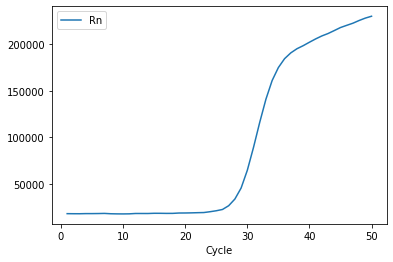

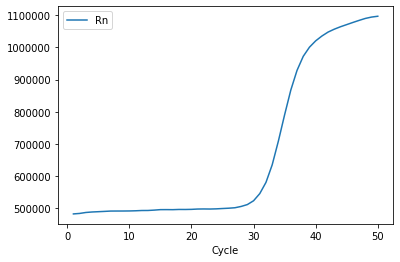

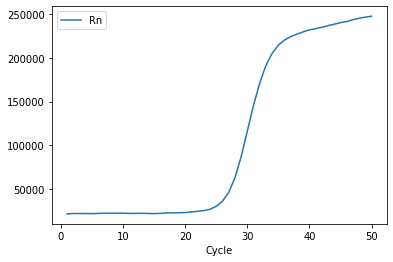

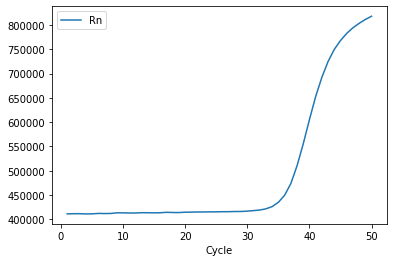

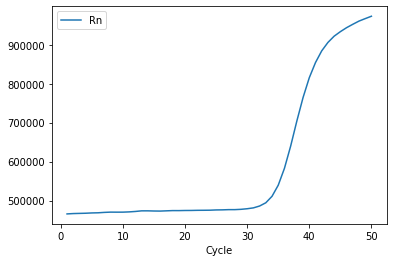

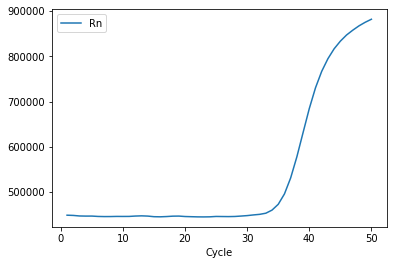

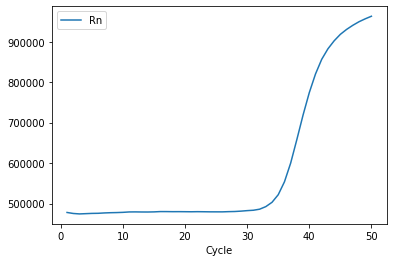

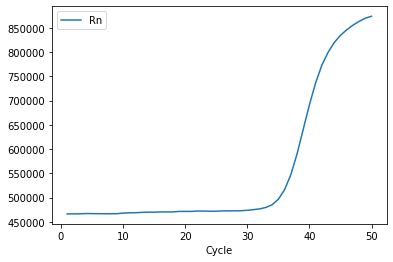

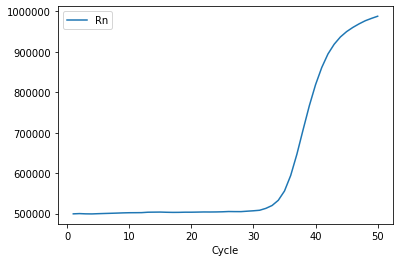

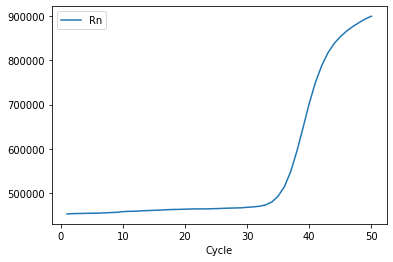

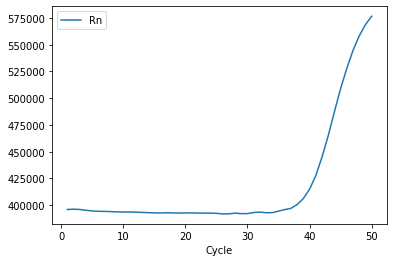

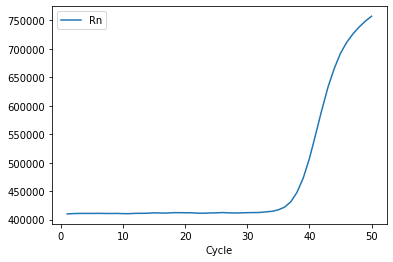

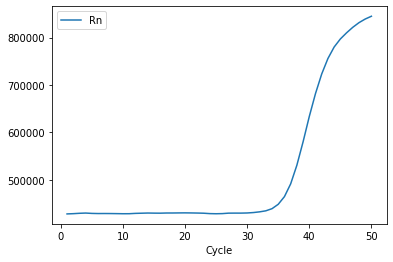

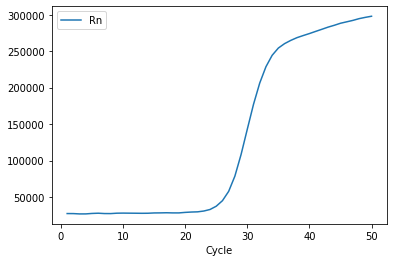

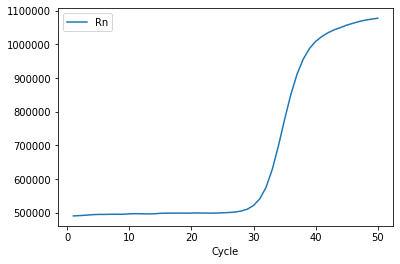

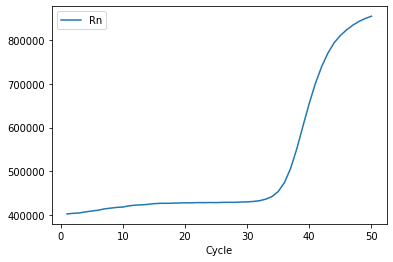

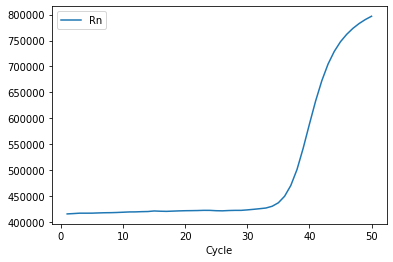

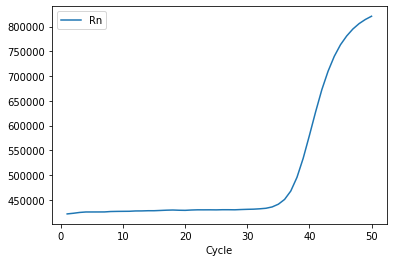

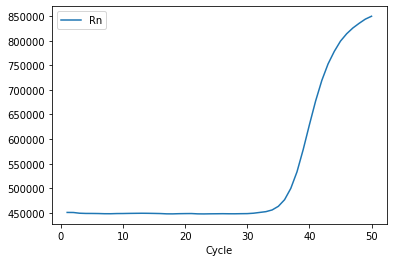

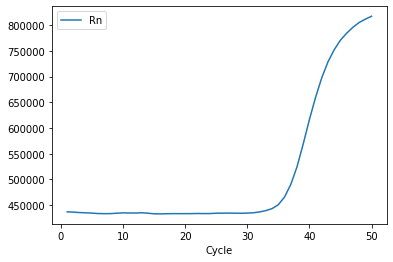

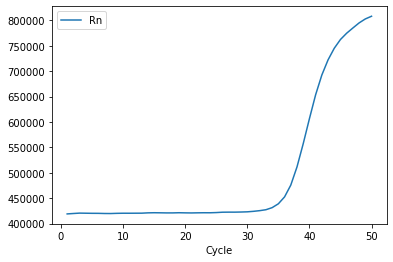

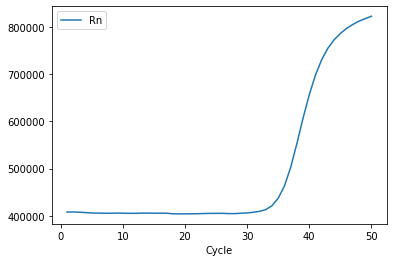

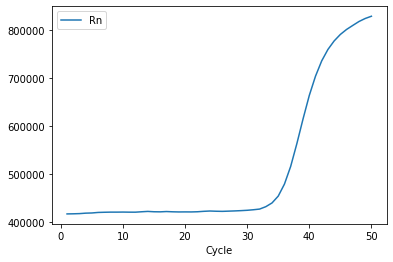

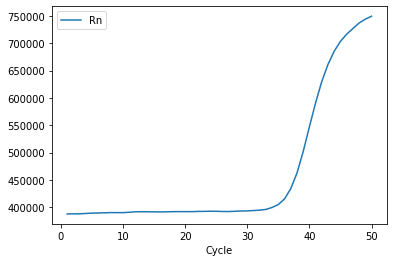

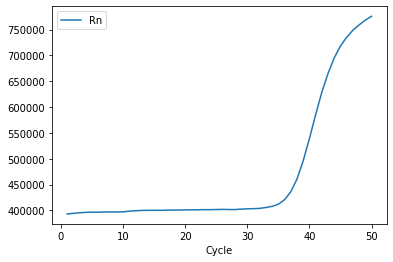

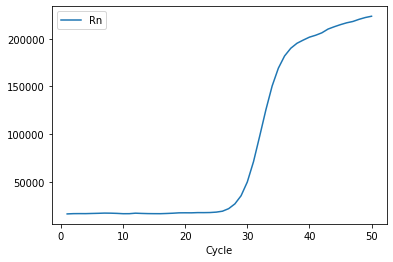

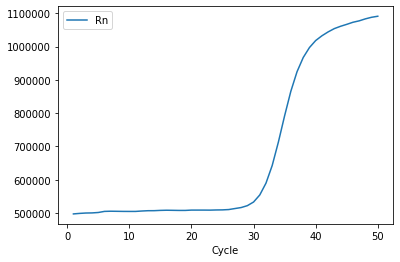

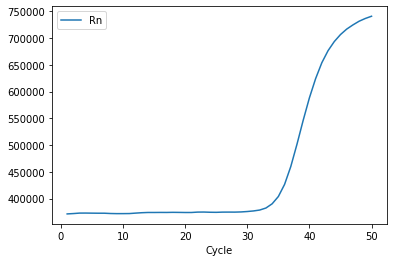

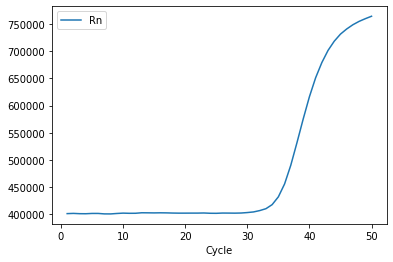

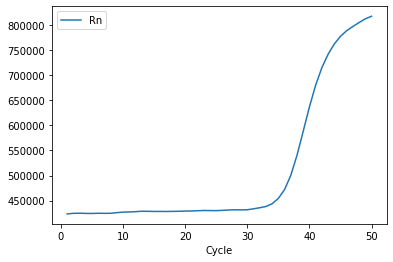

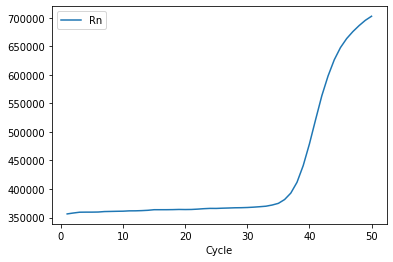

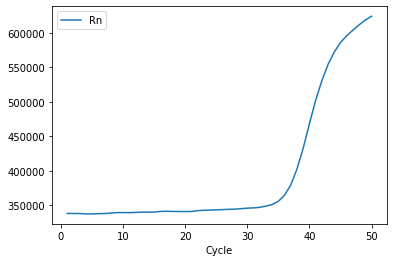

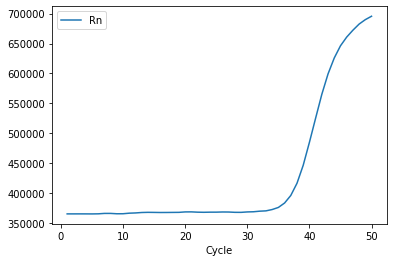

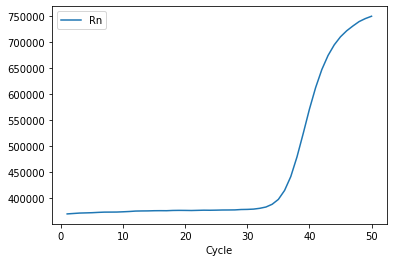

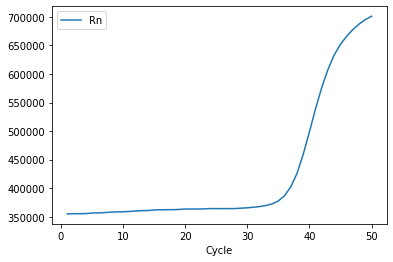

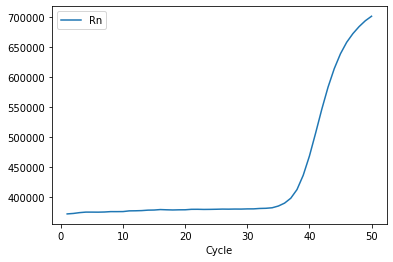

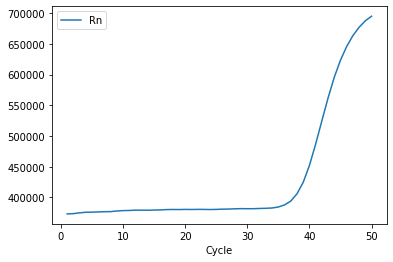

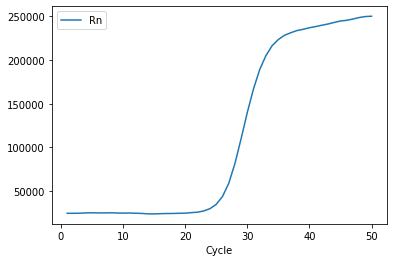

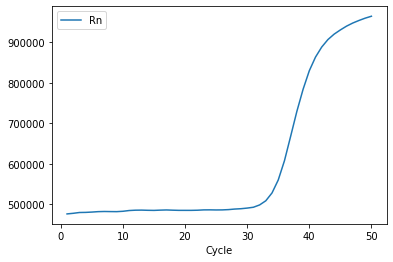

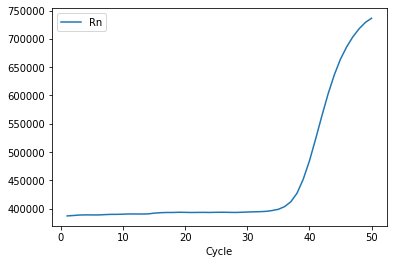

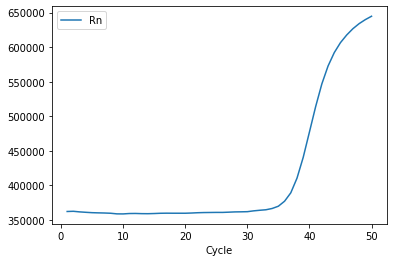

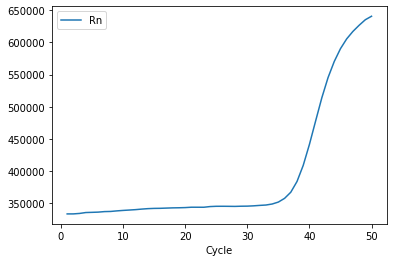

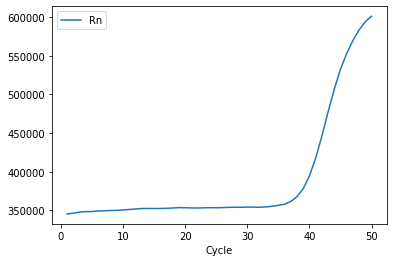

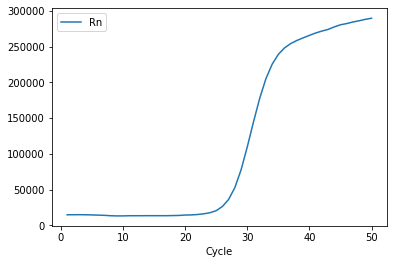

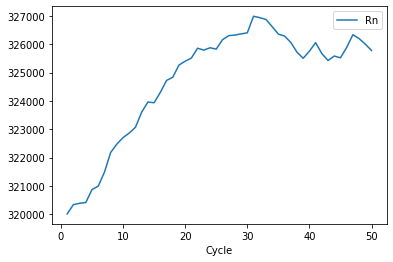

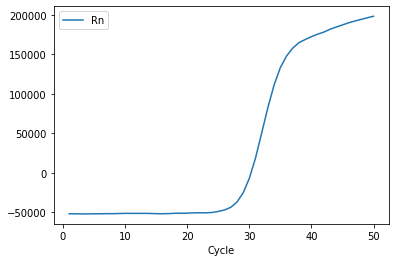

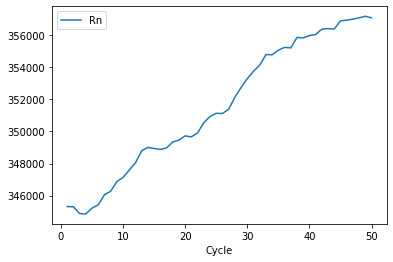

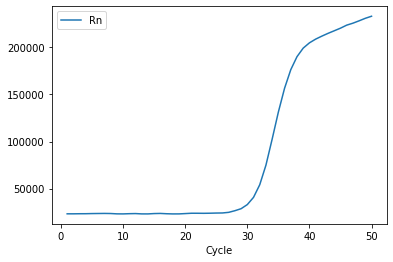

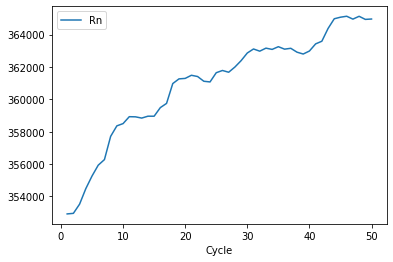

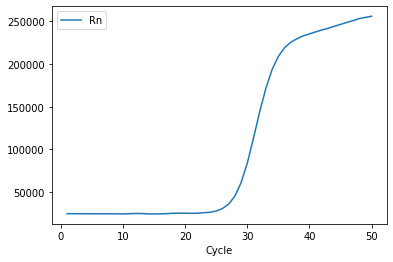

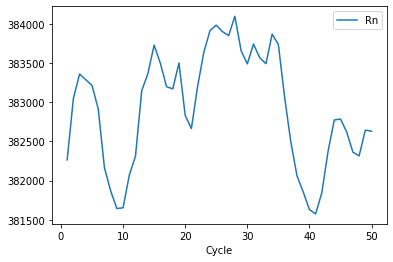

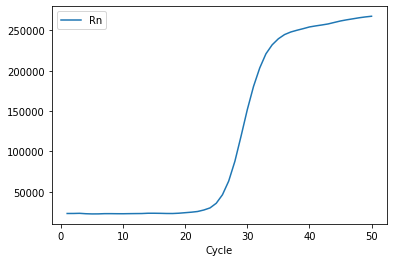

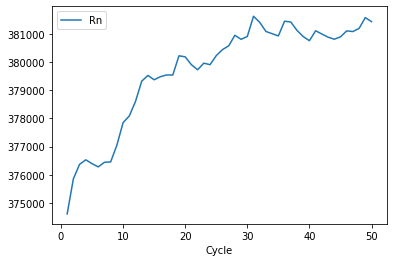

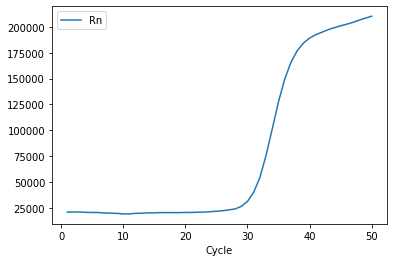

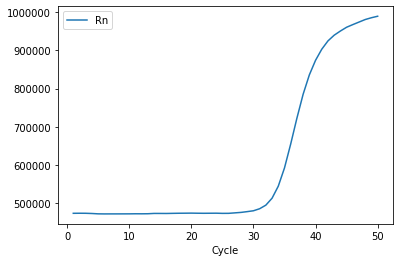

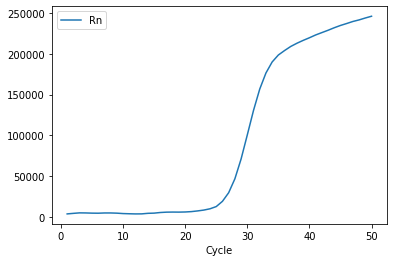

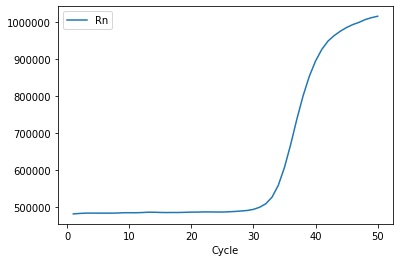

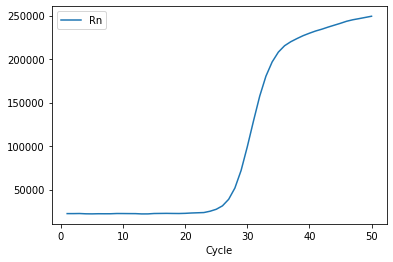

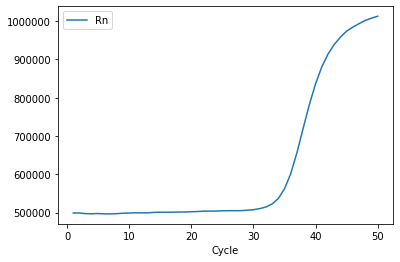

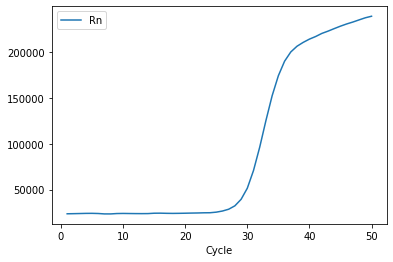

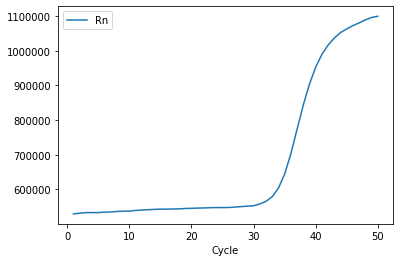

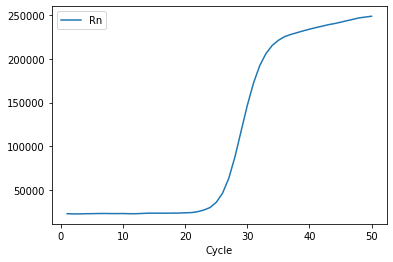

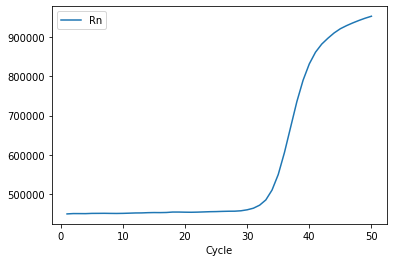

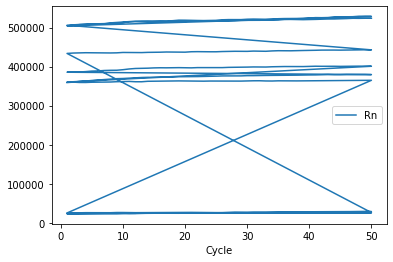

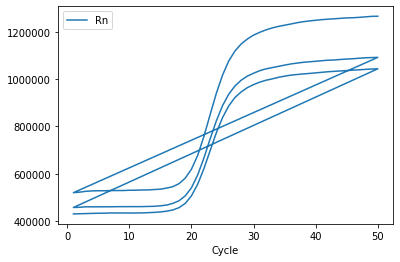

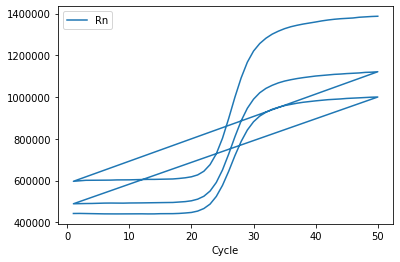

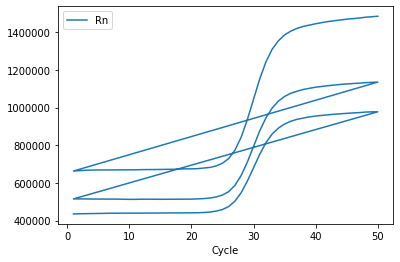

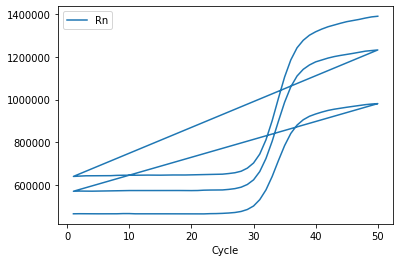

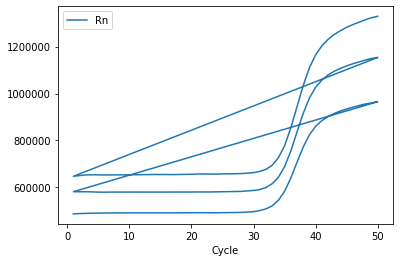

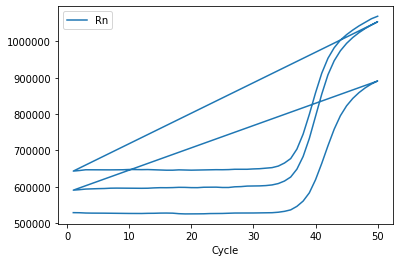

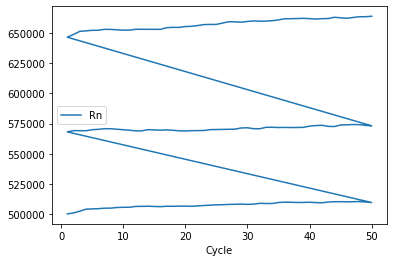

In [48]:
qpcr_amp_data[qpcr_amp_data['Target Name'] == 'FAM'].groupby('Sample Name').plot(x='Cycle', y='Rn')